# CODSOFT - Data Science Internship
# Task:5: Credit Card Fraud Detection #
## Name: Faizan Tanveer

#### Importing important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
%matplotlib inline

### 1. Reading Data

In [2]:
data=pd.read_csv("creditcard.csv")
transactions=data.copy()

In [3]:
transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
transactions.shape

(284807, 31)

In [5]:
transactions.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2. Completeness

Checking for the missing values in our dataset.

In [7]:
transactions.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### 3. Exploration

Let's visualize the relationship between our explanatory variables (features) and response variable (target), in order to do feature engineering out of it. 

In [8]:
transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

_As our tasks suggest, our dataset have a high negative class and very low positive class. We can visualize this below._

<AxesSubplot:xlabel='Class', ylabel='count'>

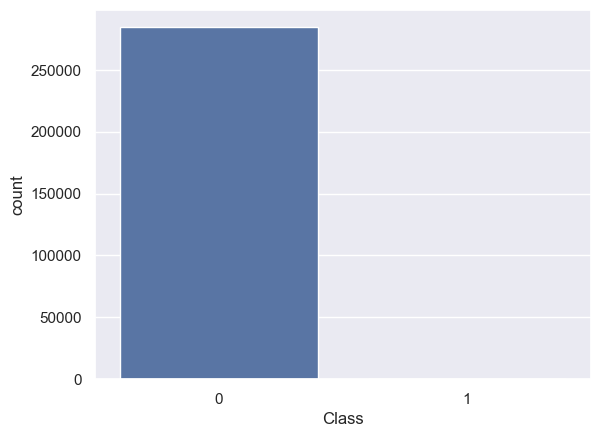

In [9]:
sns.countplot(x='Class', data=transactions)

_Let's see how does the amount of transaction affected the fraudulence._

In [10]:
transactions.groupby('Class')['Amount'].value_counts()

Class  Amount 
0      1.00       13575
       1.98        6044
       0.89        4872
       9.99        4746
       15.00       3280
                  ...  
1      1389.56        1
       1402.16        1
       1504.93        1
       1809.68        1
       2125.87        1
Name: Amount, Length: 32960, dtype: int64

_We see the probability of fraud increased with the increase in the transaction amount._

In [11]:
fraud=transactions.copy()

In [12]:
fraud.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


### 4. Feature Engineering

_Now, let's convert the columns with numerical values into the categories so we can visualize it as well._

#### a. Amount_Category

In [13]:
(transactions['Amount']<5000).shape

(284807,)

In [14]:
transactions[transactions['Amount']>5000].shape

(55, 31)

In [15]:
transactions[transactions['Amount']>10000].shape

(7, 31)

In [16]:
transactions[transactions['Amount']>15000].shape

(3, 31)

In [17]:
transactions[transactions['Amount']>20000].shape

(1, 31)

In [18]:
fraud['Amount_Category'] = ''
fraud.loc[(fraud['Amount']<5000) & (fraud['Amount']>=0), 'Amount_Category'] = '0-4999'
fraud.loc[(fraud['Amount']<10000) & (fraud['Amount']>=5000), 'Amount_Category'] = '5000-9999'
fraud.loc[(fraud['Amount']>=10000), 'Amount_Category'] = '10000+'

In [19]:
fraud.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Category
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0-4999
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0-4999


<AxesSubplot:xlabel='Amount_Category', ylabel='count'>

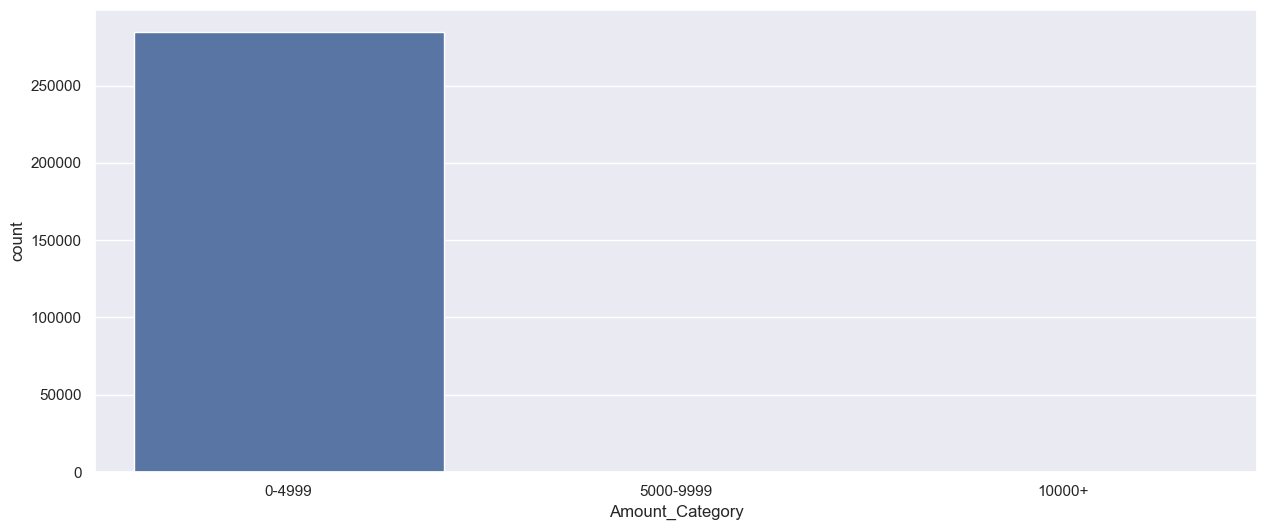

In [20]:
order_Amount_Category=['0-4999','5000-9999','10000+']
plt.figure(figsize=(15,6))
sns.countplot(data=fraud, x='Amount_Category', order=order_Amount_Category)

<AxesSubplot:xlabel='Amount_Category', ylabel='count'>

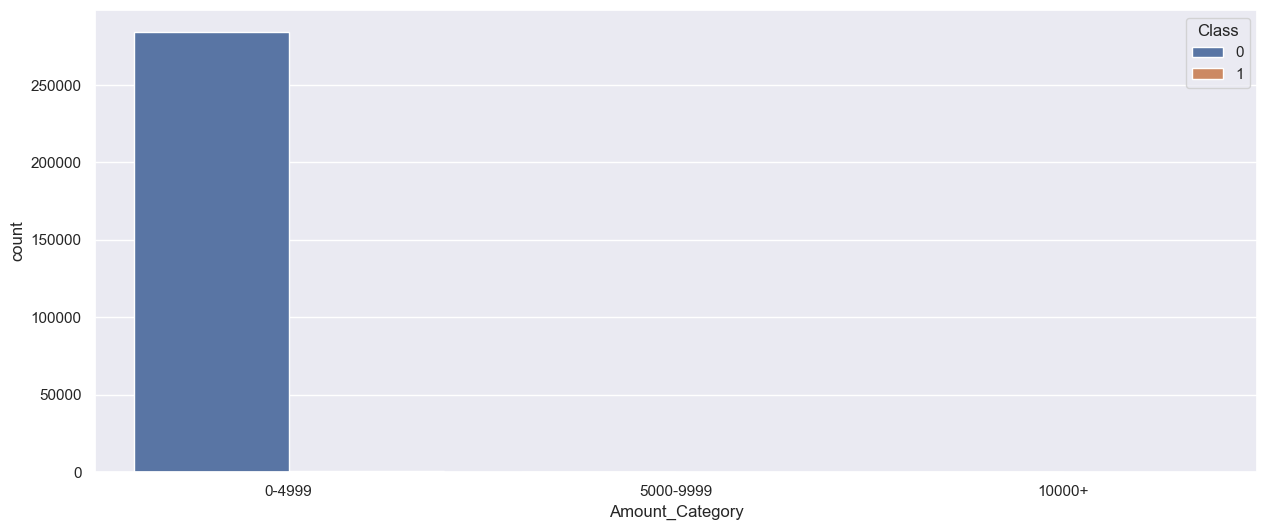

In [21]:
order_Amount_Category=['0-4999','5000-9999','10000+']
plt.figure(figsize=(15,6))
sns.countplot(data=fraud, x='Amount_Category', hue='Class', order=order_Amount_Category)

_Since, the dataset have many columns, we cannot see correlation through heatmap between the features and target variable. Neither we can check for any relationship of explanatory and response variables nor we can remove any features considering them unimportant because the features are confidential._

### 5. Applying machine learning model

#### Creating Independent and Dependent Variables

In [22]:
X=transactions.drop(['Class'], axis=1)
Y=transactions[['Class']]

In [23]:
print(X.shape)
print(Y.shape)

(284807, 30)
(284807, 1)


In [24]:
X.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69


In [25]:
Y.head(2)

,Class
0,0
1,0


#### Train Test Splitting

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain, xtest, ytrain, ytest=train_test_split(X,Y,test_size=0.3,random_state=5,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 30) (199364, 1)
(85443, 30) (85443, 1)


In [28]:
xtrain.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
260890,159767.0,2.023221,0.161762,-1.708373,1.196702,0.609290,-0.651017,0.491944,-0.222452,0.037759,...,-0.326138,0.069957,0.391197,-0.042455,-0.403419,0.458440,-0.484153,-0.020588,-0.077878,1.00
125550,77716.0,1.317510,-0.030097,-1.088762,-0.557973,2.031006,3.267737,-0.536440,0.808533,-0.052596,...,0.014732,-0.313968,-1.068359,0.104757,0.992070,0.369798,0.110490,-0.028096,0.011647,0.89


In [29]:
ytrain.head(2)

,Class
260890,0
125550,0


### Logistic Regression

Treating the response variable as categorical data and applying the logisitic regression to predict the fraudulence.

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression(random_state=25)

#### Model Training

In [32]:
model.fit(xtrain,ytrain)

D:\Others\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Others\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=25)

#### Making Prediction

In [33]:
pred = model.predict(xtest)

In [34]:
pd.DataFrame(pred).head()

,0
0,0
1,0
2,0
3,0
4,0


In [35]:
pred_prb = model.predict_proba(xtest)[:,1]

In [36]:
pd.DataFrame(pred_prb).head()

,0
0,0.000071
1,0.032484
2,0.000001
3,0.000111
4,0.000001


In [37]:
x = xtest.copy()
x['pred_probability'] = pred_prb
x['pred'] = pred
x['actual'] = ytest

In [38]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,pred_probability,pred,actual
27733,34681.0,-0.231080,-3.201858,-0.674366,-0.976167,-1.302294,0.626642,0.277071,-0.024488,1.983596,...,-0.955780,-1.220134,0.293517,0.145976,-0.094032,0.145491,810.00,0.000071,0,0
58505,48420.0,-0.295889,2.179398,-2.701905,1.295084,0.964631,-1.468709,0.915544,-0.131907,0.844712,...,0.023681,-0.857532,-0.217494,-0.378829,0.221622,-0.228443,26.99,0.032484,0,0
231716,146896.0,-1.233770,0.550555,0.149961,-0.533041,2.583473,-0.171465,1.439288,-0.056200,-1.436514,...,-0.458799,-0.361393,1.408680,-0.546275,-0.062782,0.042367,60.00,0.000001,0,0
123042,76786.0,1.192163,0.338580,0.421319,0.716534,-0.316889,-0.782785,0.034351,-0.102277,-0.037231,...,0.196427,0.367923,0.109944,0.103053,-0.004102,0.031178,0.89,0.000111,0,0
215839,140239.0,0.135040,0.252836,0.877346,-0.661467,-0.021139,0.146843,0.261205,0.075865,0.457041,...,0.000093,0.691837,-0.399797,0.640899,0.004513,0.012159,47.59,0.000001,0,0


### 6. Model Evaluation

Applying multiple model evaluation criterias to test the prediction scores.

**Confusion Matrix Play ground**

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(ytest, pred)

array([[85256,    39],
       [   53,    95]], dtype=int64)

In [41]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"predicted_fraud": [tn, fn], "pred_not fraud": [
                           fp, tp]}, index=["fraud", "not fraud"])
conf_matrix

,predicted_fraud,pred_not fraud
fraud,85256,39
not fraud,53,95


**Accuracy**

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy = accuracy_score(ytest, pred)
print("Accuracy by built-in function: {}".format(accuracy))

Accuracy by built-in function: 0.9989232587807076


**Precision**

In [44]:
from sklearn.metrics import precision_score

In [45]:
precision = precision_score(ytest, pred)
print("Precision by built-in function: {}".format(precision))

Precision by built-in function: 0.7089552238805971


**Recall**

In [46]:
from sklearn.metrics import recall_score

In [47]:
recall = recall_score(ytest, pred)
print("Recall by built-in function: {}".format(recall))

Recall by built-in function: 0.6418918918918919


**F1 Score**

In [48]:
from sklearn.metrics import f1_score

In [49]:
f1 = f1_score(ytest, pred)
print("F1 Score by built-in function: {}".format(f1))

F1 Score by built-in function: 0.673758865248227


**Classification Report**

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.71      0.64      0.67       148

    accuracy                           1.00     85443
   macro avg       0.85      0.82      0.84     85443
weighted avg       1.00      1.00      1.00     85443



**ROC Curve**

In [52]:
tpr = recall
fpr = fp / (fp + tn)

In [53]:
tpr, fpr

(0.6418918918918919, 0.00045723664927604197)

In [54]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [56]:
fpr, tpr, threshold = roc_curve(ytest, pred_prb)

In [57]:
auc = roc_auc_score(ytest, pred_prb)

In [58]:
auc

0.9276147329696777

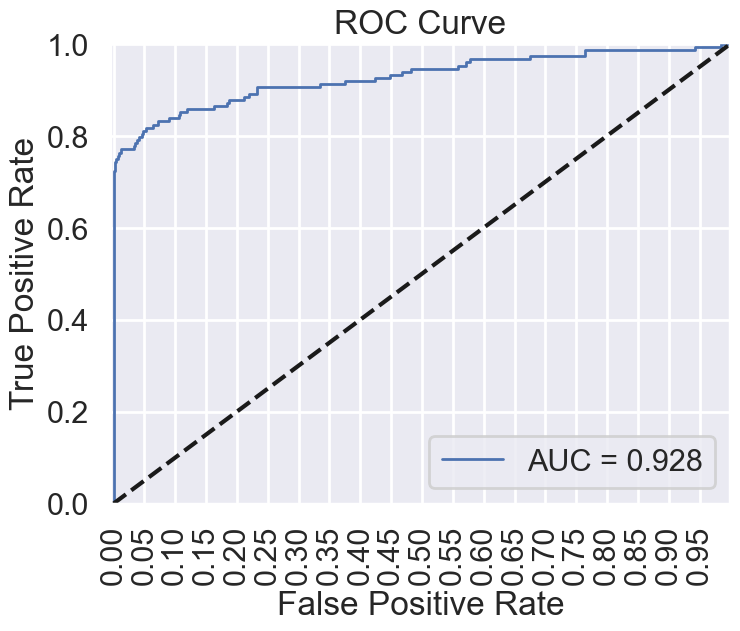

In [59]:
sns.set_context('poster')
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc)

### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
clf_rf = RandomForestClassifier(random_state=100)
clf_rf.fit(xtrain, ytrain)

C:\Users\HP\AppData\Local\Temp\ipykernel_1648\526837236.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(xtrain, ytrain)


RandomForestClassifier(random_state=100)

In [62]:
rf_pred=clf_rf.predict(xtest)
rf_pred_prb = clf_rf.predict_proba(xtest)[:, 1]

### 6. Model Evaluation

Applying multiple model evaluation criterias to test the prediction scores.

**Confusion Matrix Play ground**

In [68]:
confusion_matrix(ytest, rf_pred)

array([[85292,     3],
       [   32,   116]], dtype=int64)

In [69]:
rf_tn, rf_fp, rf_fn, rf_tp = confusion_matrix(ytest, rf_pred).ravel()
conf_matrix = pd.DataFrame({"predicted_fraud": [rf_tn, rf_fn], "pred_not fraud": [
                           rf_fp, rf_tp]}, index=["fraud", "not fraud"])
conf_matrix

,predicted_fraud,pred_not fraud
fraud,85292,3
not fraud,32,116


**Accuracy**

In [64]:
rf_accuracy= accuracy_score(ytest, rf_pred)
print("Accuracy: {}".format(rf_accuracy))

Accuracy: 0.9995903701883126


**Precision**

In [87]:
rf_precision = precision_score(ytest, rf_pred)
print("Precision: {}".format(rf_precision))

Precision: 0.9747899159663865


**Recall**

In [65]:
rf_recall= recall_score(ytest, rf_pred)
print("Recall: {}".format(rf_recall))

Recall: 0.7837837837837838


**F1 Score**

In [66]:
rf_f1_score= f1_score(ytest, rf_pred)
print("F1-Score: {}".format(rf_f1_score))

F1-Score: 0.8689138576779025


**Classification Report**

In [67]:
print(classification_report(ytest, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.78      0.87       148

    accuracy                           1.00     85443
   macro avg       0.99      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



**ROC Curve**

In [70]:
rf_tpr = rf_recall
rf_fpr = fp / (fp + tn)

In [71]:
rf_tpr, rf_fpr

(0.7837837837837838, 0.00045723664927604197)

In [72]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [73]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve')
    plt.plot(rf_fpr, rf_tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [74]:
rf_fpr, rf_tpr, threshold = roc_curve(ytest, rf_pred_prb)

In [78]:
rf_auc = roc_auc_score(ytest, rf_pred_prb)

In [79]:
rf_auc

0.9475796242927961

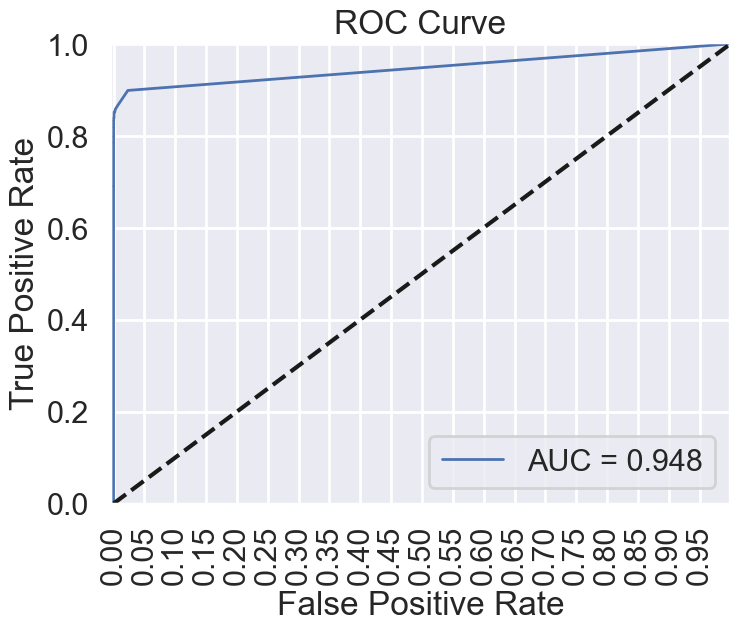

In [82]:
sns.set_context('poster')
plot_roc_curve(rf_fpr, rf_tpr, label='AUC = %0.3f' % rf_auc)

### 7. Comparing the models

In [75]:
comparison_dict={"Algorithm":["Random Forest","Logistic Regression"],
                 "Accuracy":[rf_accuracy,accuracy],
                 "Precision":[rf_precision,precision],
                 "Recall":[rf_recall,recall],
                 "F1 Score":[rf_f1_score,f1]
                }

In [76]:
comparison = pd.DataFrame(comparison_dict)
comparison

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.999590,0.974790,0.783784,0.868914
1,Logistic Regression,0.998923,0.708955,0.641892,0.673759
